In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [78]:
data = np.load('em_sim.npy')
data = data.T

time_vec = np.linspace(0, 1000, int((1000)/0.01))

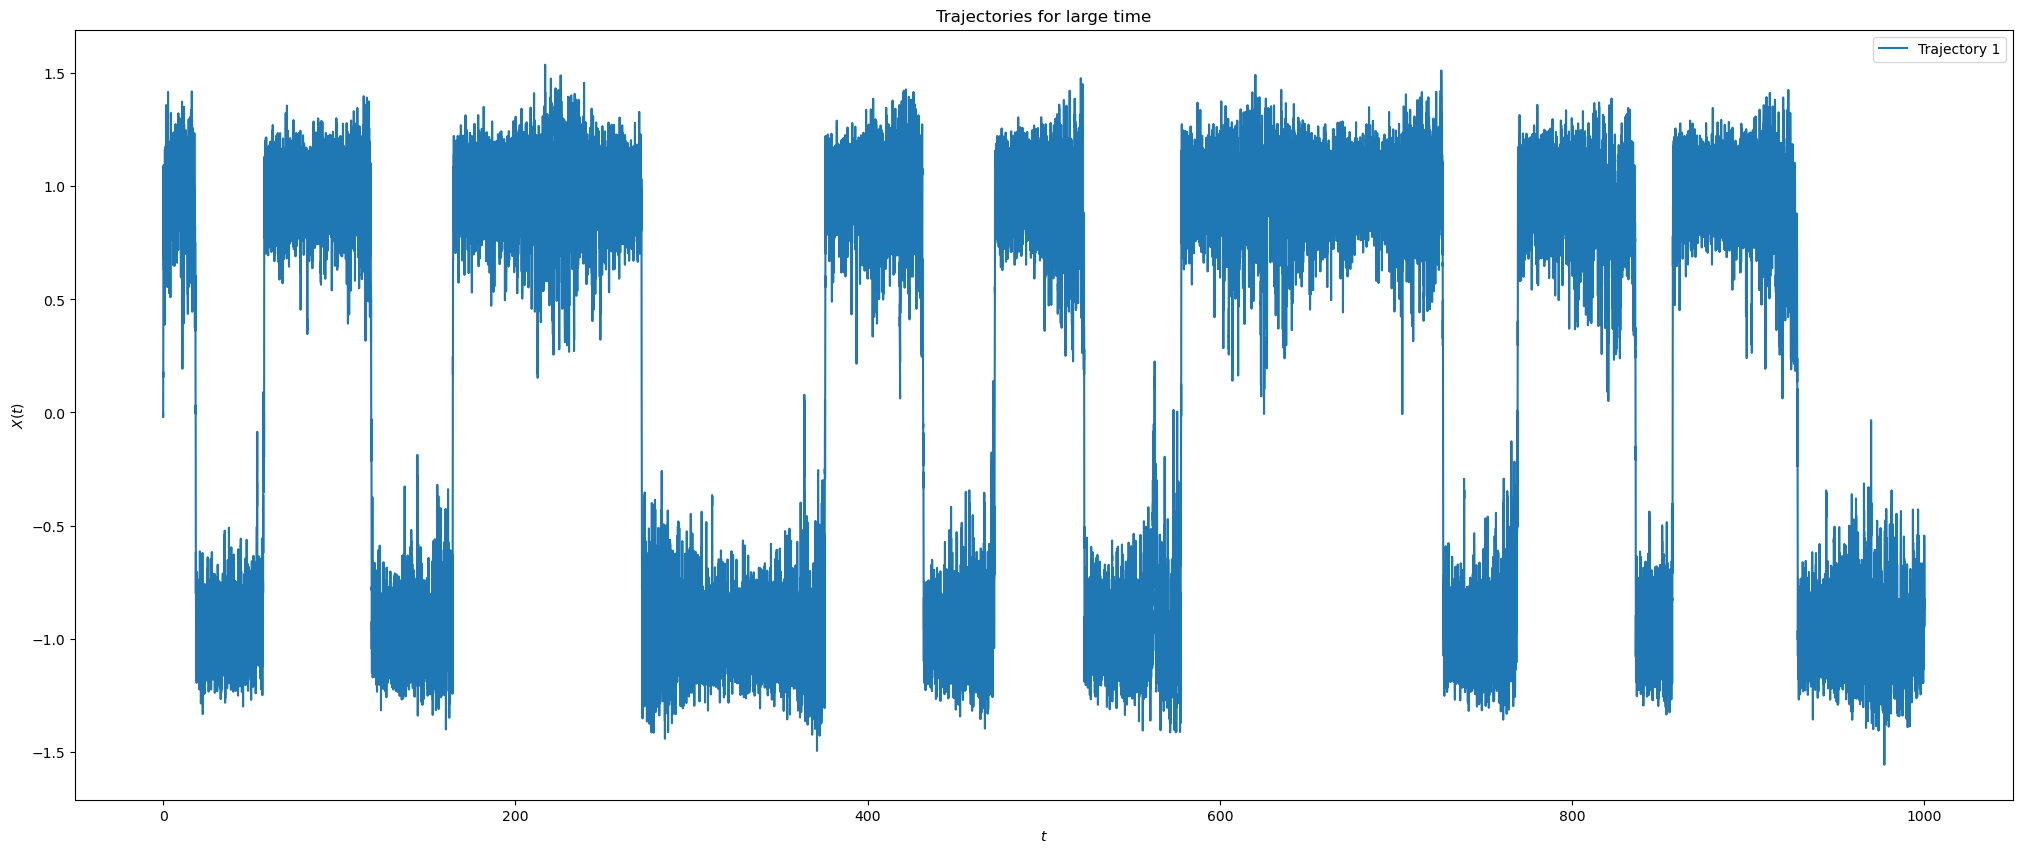

In [80]:
figure = plt.figure(figsize=(25, 10))
trajectory_plots = 1
for i in range(trajectory_plots):
    plt.plot(time_vec, data[i], alpha=1.0/trajectory_plots, label=f"Trajectory {i+1}")

plt.legend()
plt.title('Trajectories for large time')
plt.xlabel('$t$')
plt.ylabel('$X(t)$')
plt.show()

In [88]:
cutting = 75

d1 = data[0][ : int(cutting/0.01)]

time_vec = time_vec[ : int(cutting/0.01)]

neg_well = d1 <= 0

v_line_indices = [i  for i in range(1, len(neg_well)) if neg_well[i] != neg_well[i - 1]]

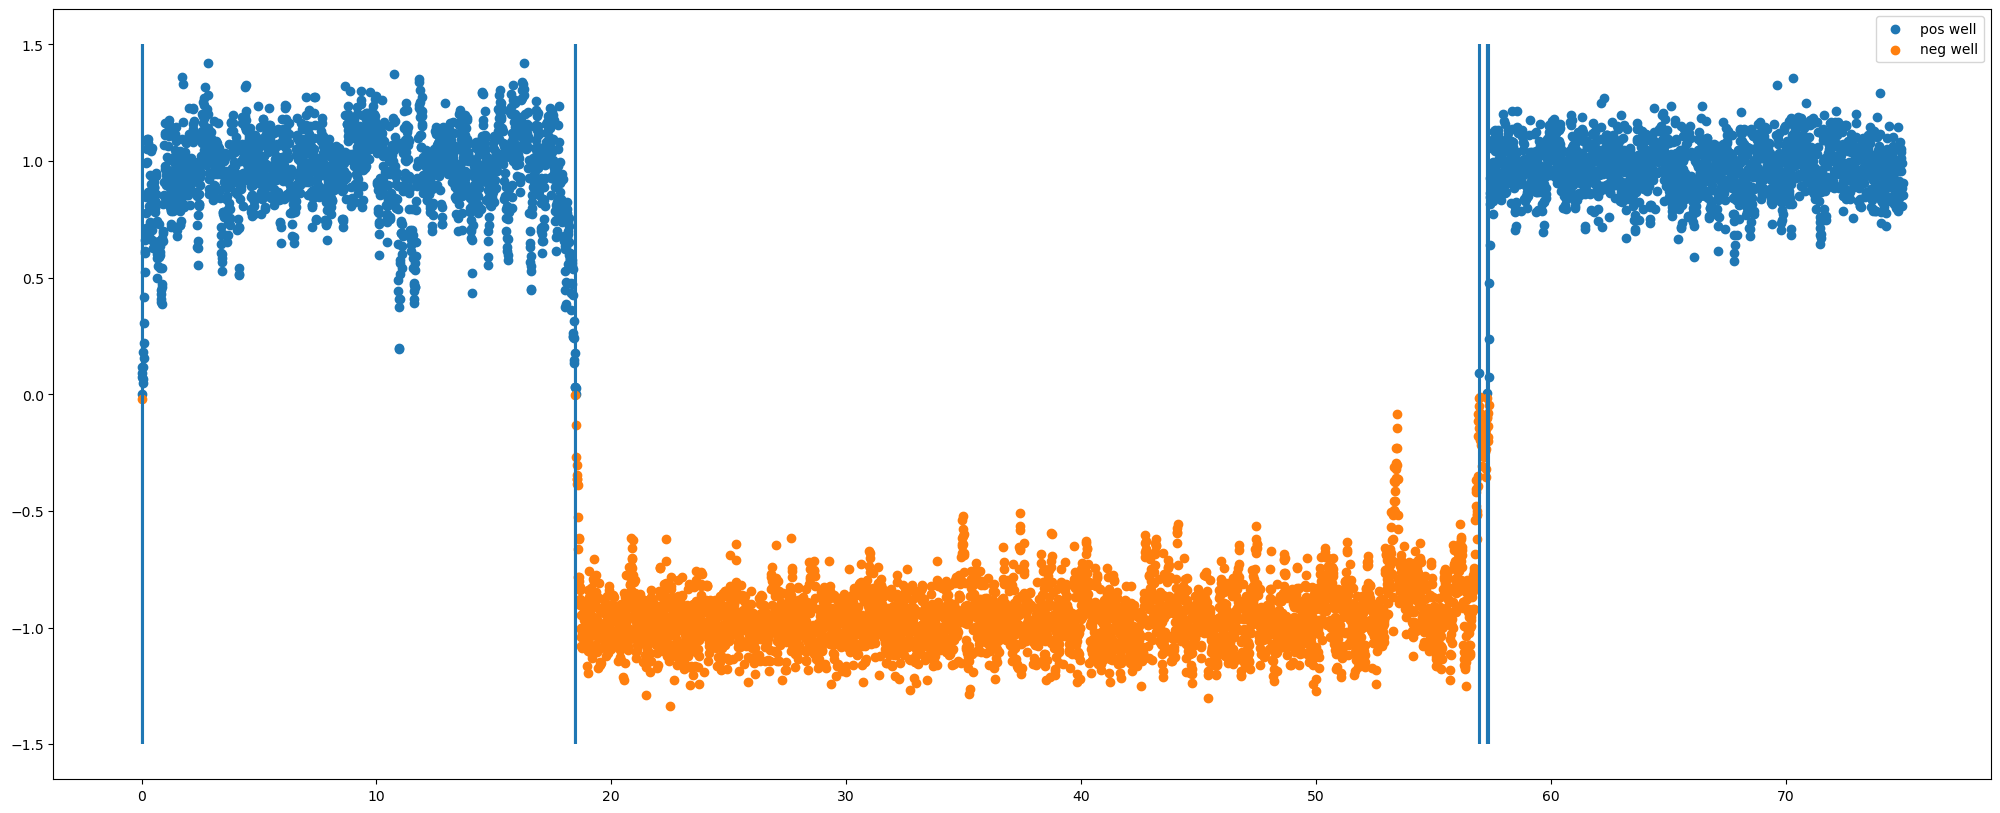

In [89]:
figure = plt.figure(figsize=(25, 10))
plt.scatter(time_vec[d1 >=0], d1[d1 >=0], label = 'pos well')
plt.scatter(time_vec[d1 <0], d1[d1 <0], label = 'neg well')
plt.vlines(x=time_vec[v_line_indices], ymin=-1.5, ymax=1.5)
plt.legend()
plt.show()